### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('marketing_cleaned.csv')
sns.set(style='whitegrid')

### Campaign Acceptance Rate Overview

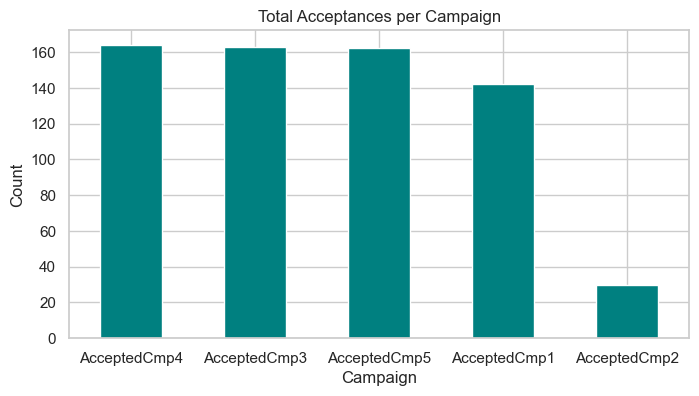

In [2]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

campaign_summary = df[campaign_cols].sum().sort_values(ascending=False)
campaign_summary.plot(kind='bar', color='teal', figsize=(8, 4))
plt.title('Total Acceptances per Campaign')
plt.ylabel('Count')
plt.xlabel('Campaign')
plt.xticks(rotation=0)
plt.show()


### Campaign Acceptance Rate (Percentage)

In [3]:
campaign_response_rate = df[campaign_cols].mean().sort_values(ascending=False) * 100
print(campaign_response_rate.round(2))

AcceptedCmp4    7.40
AcceptedCmp3    7.36
AcceptedCmp5    7.31
AcceptedCmp1    6.41
AcceptedCmp2    1.35
dtype: float64


### Acceptance by Age Group (Heatmap)

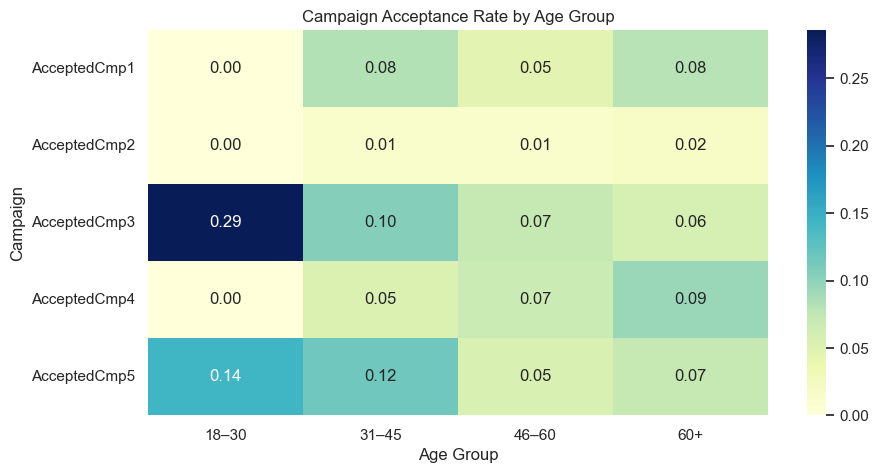

In [4]:
df_age_cmp = df.groupby('AgeGroup')[campaign_cols].mean().T

plt.figure(figsize=(10, 5))
sns.heatmap(df_age_cmp, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Campaign Acceptance Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Campaign')
plt.show()

### Campaign Acceptance by Education

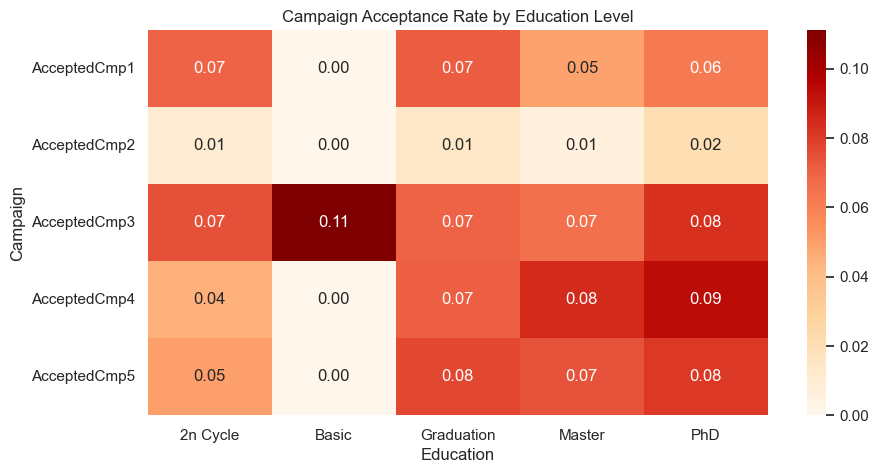

In [5]:
df_edu_cmp = df.groupby('Education')[campaign_cols].mean().T

plt.figure(figsize=(10, 5))
sns.heatmap(df_edu_cmp, annot=True, cmap='OrRd', fmt=".2f")
plt.title('Campaign Acceptance Rate by Education Level')
plt.xlabel('Education')
plt.ylabel('Campaign')
plt.show()


### Top Segment for Each Campaign

In [6]:
# Combine AgeGroup + Education
df['Segment'] = df['AgeGroup'].astype(str) + ' / ' + df['Education'].astype(str)

for cmp in campaign_cols:
    print(f"--- Top Responding Segment for {cmp} ---")
    print(df.groupby('Segment')[cmp].mean().sort_values(ascending=False).head(3))
    print()


--- Top Responding Segment for AcceptedCmp1 ---
Segment
60+ / 2n Cycle      0.163265
31–45 / PhD         0.126984
60+ / Graduation    0.086957
Name: AcceptedCmp1, dtype: float64

--- Top Responding Segment for AcceptedCmp2 ---
Segment
60+ / PhD           0.029703
46–60 / 2n Cycle    0.021978
31–45 / Master      0.019608
Name: AcceptedCmp2, dtype: float64

--- Top Responding Segment for AcceptedCmp3 ---
Segment
18–30 / Basic       1.000000
18–30 / 2n Cycle    0.333333
31–45 / Master      0.196078
Name: AcceptedCmp3, dtype: float64

--- Top Responding Segment for AcceptedCmp4 ---
Segment
31–45 / PhD     0.126984
60+ / Master    0.110345
60+ / PhD       0.103960
Name: AcceptedCmp4, dtype: float64

--- Top Responding Segment for AcceptedCmp5 ---
Segment
nan / PhD           1.000000
18–30 / 2n Cycle    0.333333
31–45 / PhD         0.206349
Name: AcceptedCmp5, dtype: float64



### ROI Estimation Logic

In [7]:
COST_PER_CAMPAIGN = 2
GAIN_PER_RESPONSE = 10
total_customers = len(df)

for cmp in campaign_cols:
    accepted = df[cmp].sum()
    cost = total_customers * COST_PER_CAMPAIGN
    gain = accepted * GAIN_PER_RESPONSE
    roi = (gain - cost) / cost * 100
    print(f"{cmp}: ROI = {roi:.2f}% | Accepted: {accepted} | Gain: ${gain}")


AcceptedCmp1: ROI = -67.96% | Accepted: 142 | Gain: $1420
AcceptedCmp2: ROI = -93.23% | Accepted: 30 | Gain: $300
AcceptedCmp3: ROI = -63.22% | Accepted: 163 | Gain: $1630
AcceptedCmp4: ROI = -63.00% | Accepted: 164 | Gain: $1640
AcceptedCmp5: ROI = -63.45% | Accepted: 162 | Gain: $1620


### Save Key Tables

In [8]:
campaign_summary.to_csv('campaign_total_acceptances.csv')
campaign_response_rate.to_csv('campaign_response_rate.csv')